# Modelling of a Neutron star


In [91]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def initial_n():
  '''Initial number of neutrons per unit volume at r=0'''
  #rho_s Central density at r=0
  #mn mass of a neutron
  n=1
  err=1
  tol=1e-15
  count=0
  #Newton Raphson method
  while err > tol:
    count+=1
    fn=236*n**(2.54)+n*mn-rho_s
    dfn=236*2.54*n**(1.54)+mn
    temp=n - fn/dfn
    err=np.abs(n-temp)
    n=temp
  print("Newton-Raphson converged after ",count," iterations")
  return n


In [93]:
def rho(p):
  '''
  Energy density of a neutron star at a given pressure
  '''
  n=(p*rho_s/363.44)**(1/2.54)
  return (236.*n**2.54+n*mn)/rho_s

In [94]:
def dp_dr(r,m,p,flag):

    '''
    Pressure Gradient
    r - distance from the center of neutron star
    m - mass enclosed within the value of r
    p - pressure at that value of r
    flag - choose between classical and relativistic models
    '''

    if flag == 0:
        # Classical Model
        y = -m*rho(p)/(r**2 + 1e-20)

    else:
        # Relativistic Model
        y = -(p+rho(p))*(m + p*r**3)/(r**2 - 2*m*r + 1e-20)

    return y

In [95]:
def dm_dr(r,m,p):
  '''
  Mass Gradient
  '''
  return ((r**2)*rho(p))

In [96]:
def RK4Solver(r,m,p,h,flag):

    '''
    Runge - Kutta 4th order Method
    Calculates 4 different pressure and mass gradients
    K1_ - Mass Gradients
    K2_ - Pressure Gradients
    '''
    y = np.zeros(2)                                               # To store the next value of m and p

    # Gradient 1 at start point
    k11 = dm_dr(r, m, p)
    k21 = dp_dr(r, m, p, flag)

    # Gradient 2 at mid of start and end point
    k12 = dm_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h)
    k22 = dp_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h, flag)

    # Gradient 3 at mid of start and end point
    k13 = dm_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h)
    k23 = dp_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h, flag)

    # Gradient 4 at end point
    k14 = dm_dr(r + h, m + k13*h, p + k23*h)
    k24 = dp_dr(r + h, m + k13*h, p + k23*h, flag)

    # Updation of m and p
    y[0] = m + h*(k11 + 2*k12 + 2*k13 + k14)/6
    y[1] = p + h*(k21 + 2*k22 + 2*k23 + k24)/6

    return y

In [97]:
def plot_data(color,label):
  #Mass Profile
  plt.subplot(1,2,1)
  plt.plot(r*R0*1e-18, m*M0/Ms, color=color, linewidth=1.2,label=label)
  plt.xlabel('Distance, $r$ (km)',fontsize=13)
  plt.ylabel('Mass, $M/M_{sun}$', fontsize=13)
  plt.title('Mass Profile of a Neutron Star', color='tab:red',weight='bold',fontsize=15)
  plt.xlim(left=0)
  plt.ylim(bottom=0)
  plt.legend(fontsize=13, frameon=False)

  #Pressure Profile
  plt.subplot(1,2,2)
  plt.plot(r*R0*1e-18, p*rho_s, color=color, linewidth=1.2,label=label)
  plt.xlabel('Distance, $r$ (km)',fontsize=13)
  plt.ylabel('Pressure, $P$ $(MeV/fm^{3})$', fontsize=13)
  plt.title('Pressure Profile of a Neutron Star', color='tab:red',weight='bold',fontsize=15)
  plt.xlim(left=0)
  plt.ylim(bottom=0)
  plt.legend(fontsize=13, frameon=False)

In [98]:
#Simulation parameters and conversion factors
hc=197.327                                   #Conversion factor in MeV ( h bar * c)
G= hc* 6.67259e-45                           #Gravitational Constant in MeV^-1 fm^3 kg ^-1
Ms=1.1157467e60                              #Mass of sun in MeV
rho_s=1665.3                                 #Central density of neutron star (density at r=0) in MeV/fm^3
M0=(4*3.14159265*(G**3)*rho_s )**(-0.5)      #Dimensionless mass from rk4 method to MeV
R0=G*M0                                      #Same giving dimension of fm to R0
mn=938.926                                   #Mass of a neutron in MeV c^-2

In [99]:
#Initialising Values and Arrays

'''Values for radius, step size and tolerance value'''
N = 1000                              # Total number of data points
r = np.linspace(0,15,N)               # values of radius to compute enclosed mass within it, pressure and density profiles
h = r[1]-r[0]                         # step size for RK4Solver
tol = 9e-5                            # tolerance for RK4Solver

'''Arrays to store the updation values in RK4Solver'''
m = np.zeros(N)                       # mass
p = np.zeros(N)                       # pressure

'''Initial Number Density of Neutrons at r = 0'''
ni = initial_n()

'''Setting intial values in the array - values at the center of the neutron star'''
r[0] = 0                              # radius
m[0] = 0                              # mass
p[0] = 363.44 * (ni**2.54)/rho_s      # pressure

'''Setting flags for choosing between classical and relativistic model'''
flag_set = [0,1]

'''Printing Inital Values'''
print("Initial number density, ni =", ni)
print("Initial Pressure, P[0] = ", p[0]*rho_s, "MeV/fm^3")
print("Simulation range, R = 0 to R =", r[-1]*R0*1e-18, "km") # 1e-18 is the conversion factor from femtometers to kilometers
print("Step size for RK4 Solver:", h)


Newton-Raphson converged after  5  iterations
Initial number density, ni = 1.2918969375342138
Initial Pressure, P[0] =  696.5487390842761 MeV/fm^3
Simulation range, R = 0 to R = 90.36486611870906 km
Step size for RK4 Solver: 0.015015015015015015



Classical Model Results: P < 9e-05 found after 183 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  10.076537275557 times Solar mass
Radius of the Neutron star =  16.643779144987455 km

Relativistic Model Results: P < 9e-05 found after 107 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  1.8782830063058356 times Solar mass
Radius of the Neutron star =  9.769174715536113 km



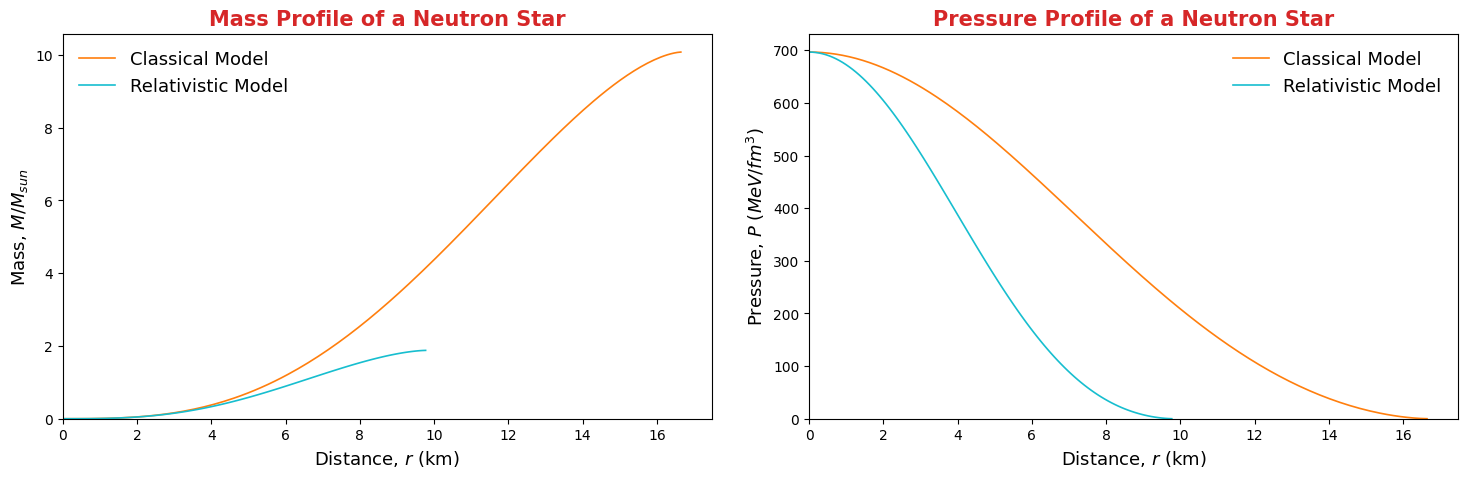

In [100]:
'''Using RK4 Numerical Method for modeling a neutron star'''
plt.figure(figsize = (18, 5))                                   # setting up the figure size for subplots
for k in range(0,2):                                            # k will take two values in this run --> 0 and 1
    flag = flag_set[k]                                          # flag_set[0] = 0, flag_set[1] = 1
    for i in range(0,N-1):                                      # for 1500 iterations
                                                                # if the flag is set to 0
        [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag)     # use classical model else use relativistic model
        if p[i+1] < tol:                                        # if the value of the pressure goes below tolerance (close to 0 as we know)
            break                                               # the simulation is completed
    print()                                                     # for a new line between outputs
    if i == N-2:                                                # if the pressure value was not able to go below the tolerance value
        lbl1 = "Program didn't converge to P = 0, extend the maximum value of r" # print to increase the itetarations of simulation --> values of r
    else:                                                       # if simulation stopped before this
        lbl1 = f"P < {tol} found after {i} runs"                # print the conclusion statement

    '''Keep only the used indices of array discarding the remaining ones'''
    m = m[:i+2] # m[0:i+2 --> Exclusive index]
    p = p[:i+2]
    r = r[:i+2]

    '''Time to visualise and print the results'''
    if flag == 0:
        lbl = "Classical Model"
        plot_data('tab:orange', "Classical Model")
    else:
        lbl = "Relativistic Model"
        plot_data('tab:cyan', "Relativistic Model")

    '''Printing the overall output'''
    print ("==================================================================")
    print (lbl, "Results:", lbl1)
    print ("==================================================================")
    print ("Initial density, rho_s = ", rho_s, "MeV/fm^3")
    print ("Total mass = ", m[-1]*M0/Ms, "times Solar mass")
    print ("Radius of the Neutron star = ", r[-1]*R0*1e-18, "km")

print()
plt.subplots_adjust(wspace = 0.15)